In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [8]:
!pwd

/c/Users/salaz/Desktop/My Git


In [ ]:
output_data_file = 'C:\Users\salaz\Desktop\My Git\output_data\cities.csv'

In [10]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


592

In [12]:
# base url & units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={api_key}&units={units}&q="


In [13]:
# set up lists to hold response info
Name = []
Clouds = []
Country = []
Date = []
Humid = []
Lat = []
Lng = []
Max_temp = []
Wind = []

# loop through the list of cities and perform a request for column data on each
# build in try: / except: to work around 'KeyError' for no data being available for a city
for city in cities:
    response = requests.get(query_url + city).json()
    print(city)
    try:
        Name.append(response['name'])
        Clouds.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humid.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Wind.append(response['wind']['speed'])
    except KeyError:
        print ("An error occurred")
        

saint anthony
punta arenas
bluff
busselton
rikitea
kikwit
vila velha
vaini
avarua
urumqi
An error occurred
torbay
mataura
yellowknife
hobart
stoyba
An error occurred
morondava
lagos
jamestown
new norfolk
saint-joseph
bowen
sorland
albany
adrar
hermiston
kodiak
illoqqortoormiut
An error occurred
ahipara
vysokogornyy
tiksi
hilo
nishihara
barrow
hermanus
atuona
miranda
clyde river
sokoni
atar
mackay
yaan
talcahuano
qaanaaq
victoria
zanjan
bayanday
bairiki
An error occurred
marsh harbour
ushuaia
yerbogachen
faya
ust-kuyga
carnarvon
port elizabeth
teguise
manavalakurichi
karaul
An error occurred
namibe
minas
taolanaro
An error occurred
norman wells
miyako
shelburne
malanje
klaksvik
bay roberts
grand centre
An error occurred
kenai
mahebourg
meadow lake
bababe
An error occurred
sawakin
namatanai
steamboat springs
sanming
tura
katete
cape town
stabat
butaritari
belushya guba
An error occurred
nepa nagar
cherskiy
caravelas
arman
tanout
chuy
opotiki
kaitangata
castro
san quintin
attawapiskat
An 

In [14]:
# create a data frame from the populated lists
Country_weather_dict = {"City":Name, "Cloudiness":Clouds, "Country":Country, "Date":Date, "Humidity":Humid, "Latitude":Lat,
               "Longitude":Lng, "Max Temp":Max_temp, "Wind Speed":Wind}

weather_df = pd.DataFrame(Country_weather_dict)
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Saint Anthony,90,US,1551930614,98,43.97,-111.68,37.00,5.82
1,Punta Arenas,0,CL,1551930191,100,-53.16,-70.91,39.20,14.99
2,Bluff,0,AU,1551930701,40,-23.58,149.07,94.00,10.78
3,Busselton,92,AU,1551930614,60,-33.64,115.35,75.00,5.97
4,Rikitea,76,PF,1551930435,100,-23.12,-134.97,79.69,18.05


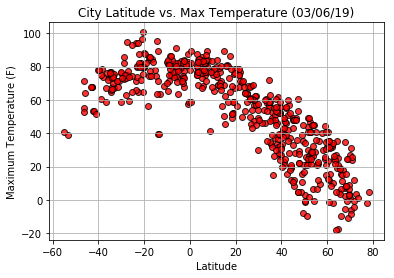

In [32]:
# TREND 1: As City Latitude increases, the Maximum temperature drops.
# Latitude vs. Max Temperature plot
plt.scatter(Lat, Max_temp, color="red", alpha=0.8, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max Temperature (03/06/19)")
plt.grid()
plt.savefig('Lat_VS_Max_Temp')
plt.show()

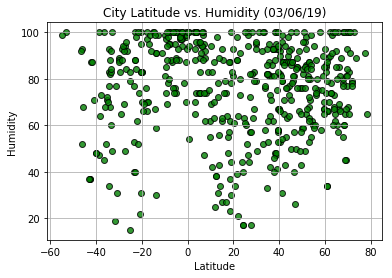

In [33]:
#Trend 2: There seems to be little correlation between Latitude and Humidity
# Latitude vs. Humidity plot
plt.scatter(Lat, Humid, color="green", alpha=0.8, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (03/06/19)")
plt.grid()
plt.savefig('Lat_VS_Humidity')
plt.show()

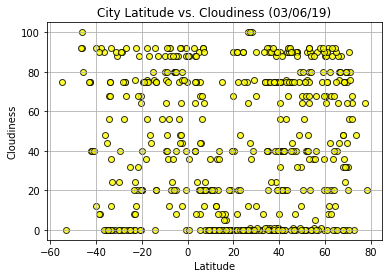

In [34]:
#Trend 3: there seems to be higher concentration of cloudiness when Latitude is more on the extreme spectrum. Seems to be a weak correlation
# Latitude vs. Cloudiness plot
plt.scatter(Lat, Clouds, color="yellow", alpha=0.8, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (03/06/19)")
plt.grid()
plt.savefig('Lat_VS_Clouds',bbox_inches='tight')
plt.show()

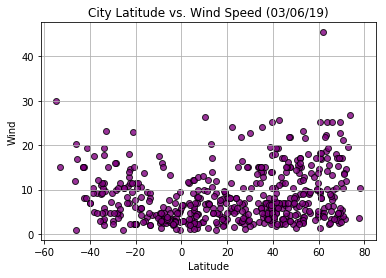

In [35]:
# Latitude vs. Wind Speed plot
plt.scatter(Lat, Wind, color="purple", alpha=0.8, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title("City Latitude vs. Wind Speed (03/06/19)")
plt.grid()
plt.savefig('Lat_VS_Wind')
plt.show()

In [24]:
weather_df.to_csv(r'C:\Users\salaz\Desktop\My Git\output_data.csv', index=False, header=True)